In [4]:
import pandas as pd
import json
import re

# 4chan -> Low level moderation (moderation varies from board to board but in escence all illegal related content is removed), aside from ilegal content, the board is also moderated for spam and other types of abuse. The majority of speech aside from that is allowed.

## Cleaning text and performing a base level analysis

In [5]:
# lets transform the data into a pandas dataframe, currently it is stored in a dictionary of k=str, v=list[str]
# we will use the json module to load the data from the json file
with open('../Data/data_chan.json', 'r') as f:
    data = json.load(f)

# Create a pandas dataframe with 2 title and comment columns
df = pd.DataFrame(columns=['title', 'comment'])

# Iterate through the dictionary and append the data to the dataframe
for title, comments in data.items():
    for comment in comments:
        df = df.append({'title': title, 'comment': comment}, ignore_index=True)

In [6]:
df.head()

title  \
0  All the cool kids are doing it.   
1  All the cool kids are doing it.   
2  All the cool kids are doing it.   
3  All the cool kids are doing it.   
4  All the cool kids are doing it.   

                                             comment  
0  &gt;&gt;400714173&gt;no pepe what are you doin...  
1  &gt;&gt;400708757https://www.youtube.com/watch...  
2  &gt;&gt;400713918&gt;if you don&#039;t like th...  
3  &gt;&gt;400708823And I wonder how many big ole...  
4  &gt;&gt;400714594Vatniggers get into the meat ...

In [7]:
# lets make some preeliminary analysis on the data with spacy
import spacy
nlp = spacy.load('en_core_web_md')

In [8]:
# clean the text from 'title' and 'comment' columns
def clean_text(text):
    # make everything lowercase
    text = text.lower()
    # only lowercase letters no numbers or special characters
    text = re.sub(r'[^a-z]', ' ', text)
    # Remove any website links
    text = re.sub(r'http\S+', '', text)
    # only accept nouns, pronouns and entities
    doc = nlp(text)
    text = [token.text for token in doc if token.pos_ in ['NOUN', 'PROPN', 'PRON', 'ADJ'] and len(token.text) > 3 and 'quot' not in token.text]
    return text

In [9]:
# apply the clean_text function to the dataframe
# df['title'] = df['title'].apply(clean_text)
df['comment'] = df['comment'].apply(clean_text)

In [10]:
# remove comments with less than 3 words
df = df[df['comment'].apply(lambda x: len(x) > 3)]

In [11]:
df.head()

title  \
2                     All the cool kids are doing it.   
3                     All the cool kids are doing it.   
7   &gt;Two 16-year-old twins escaped from their a...   
9   &gt;Two 16-year-old twins escaped from their a...   
13  &gt;State Sen. Scott Wiener is mobilizing alli...   

                                              comment  
2   [richard, spencer, tier, opposition, ukrainian...  
3   [many, brains, titanic, imagery, their, meme, ...  
7                         [they, black, nobody, this]  
9   [bitch, your, good, women, physical, mental, h...  
13          [this, paper, everything, italy, crooked]

In [12]:
# lets create a new column with the length of the comment
df['length'] = df['comment'].apply(lambda x: len(x))

In [13]:
df.shape

(5812, 3)

## Sentiment and Subjectivity Analysis

In [14]:
# lets analyze the sentiment of the comments
from spacytextblob.spacytextblob import SpacyTextBlob
nlp.add_pipe('spacytextblob')

In [15]:
# lets create a new column with the sentiment of the comment
df['sentiment'] = df['comment'].apply(lambda x: nlp(' '.join(x))._.blob.polarity)

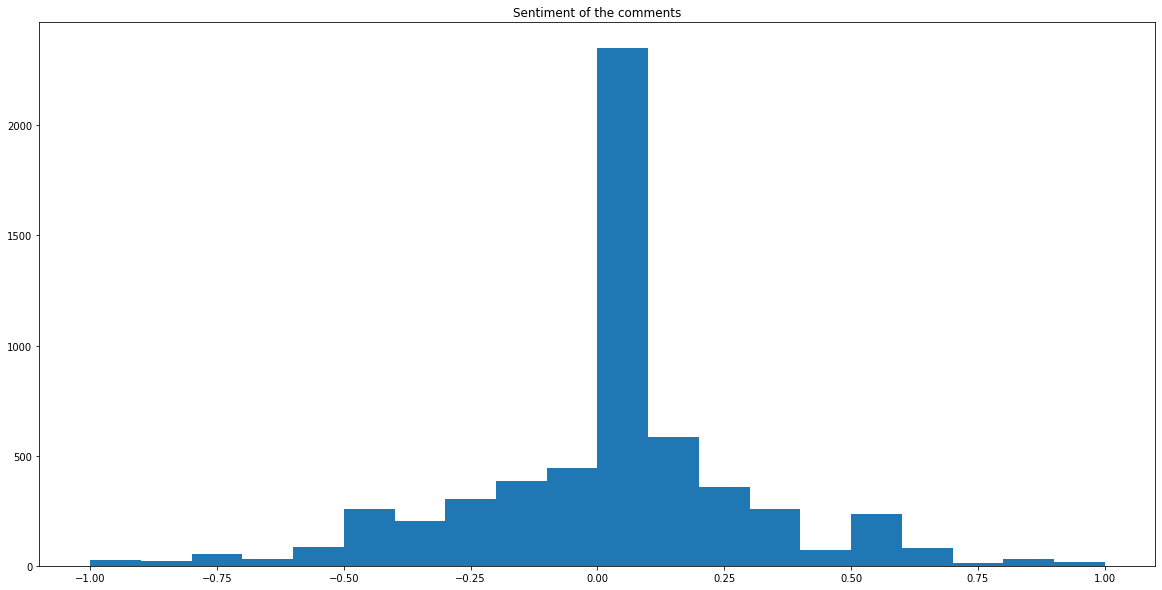

In [16]:
# lets plot the sentiment of the comments
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.hist(df['sentiment'], bins=20)
plt.title('Sentiment of the comments')
plt.show()

In [17]:
# show 5 samples of negative comments, in which sentiment is less than -0.5
df[df['sentiment'] < -0.5].sample(5)

title  \
1696  https://banned.video/watch?id=635c4a7164118e38...   
5238                    Fuck these goddamned satanists.   
7823                                      Here´s mine..   
4614                                        He’s right.   
8292  ITS HAPPENING&gt;ITS HAPPENINGITS HAPPENING&gt...   

                                                comment  length  sentiment  
1696   [spicy, argument, neekolul, sweaty, that, crazy]       6      -0.60  
5238         [fuck, cartoons, animelittle, kids, idiot]       5      -0.60  
7823  [comfy, fuck, belgium, ugly, country, there, n...       7      -0.55  
4614            [them, fucking, country, they, fucking]       5      -0.60  
8292                  [powers, moron, despicable, evil]       4      -0.90

In [18]:
# show 5 samples of positive comments, in which sentiment is greater than 0.5
df[df['sentiment'] > 0.5].sample(5)

title  \
567   https://youtu.be/qSUI0n7zGNghttps://youtu.be/u...   
3568    Government Controlled lottery reaches 1 billion   
3087          How would you characterize leftist humor?   
2540                Any tips how to beat the inflation?   
6665  Is Pennsylvania fucked? I live there and I am ...   

                                                comment  length  sentiment  
567   [wahat, that, puppet, puppet, puppet, kikes, l...       7     0.6000  
3568  [lottosonline, raffle, christmas, gordo, raffl...       8     0.7000  
3087  [steven, colbert, epstien, island, traveller, ...      15     0.6000  
2540  [grocery, stores, perimeter, essentials, isles...      10     0.8000  
6665  [obama, trump, biden, rich, your, opioidscovid...       8     0.5875

In [19]:
# lets create a new column with the subjectivity of the comment
df['subjectivity'] = df['comment'].apply(lambda x: nlp(' '.join(x))._.blob.subjectivity)

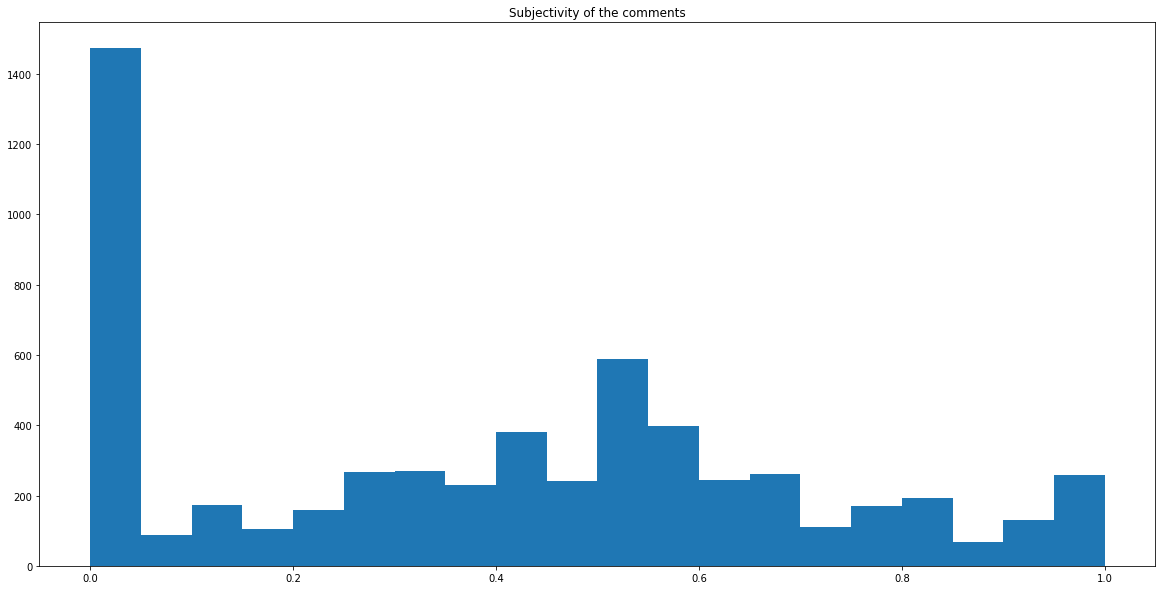

In [20]:
# lets plot the subjectivity of the comments
plt.figure(figsize=(20, 10))
plt.hist(df['subjectivity'], bins=20)
plt.title('Subjectivity of the comments')
plt.show()

In [21]:
# show 5 samples of subjective comments, in which subjectivity is greater than 0.5
df[df['subjectivity'] > 0.5].sample(5)

title  \
2269  Jerry Lee Lewis was on his way to Donald Trump...   
2218  Statues and other forms of art visibly decreas...   
731   Census dot gov claims that the black populatio...   
8054  &gt;3 large military helicopters just flew ove...   
5611  If whites, jews and chinks have the highest iq...   

                                                comment  length  sentiment  \
2269  [guess, againjerry, lewis, backthis, timethe, ...       8     0.8000   
2218  [rome, great, architecture, other, that, state...      10     0.3375   
731   [problem, whites, invitingthis, biggest, probl...      30     0.1200   
8054   [dawww, whatta, cute, luminescent, negro, first]       6     0.3750   
5611  [outlier, story, indians, streetshitters, that...       6    -0.5000   

      subjectivity  
2269      0.750000  
2218      0.562500  
731       0.625000  
8054      0.666667  
5611      0.900000

In [22]:
# show 5 samples of objective comments, in which subjectivity is less than 0.5
df[df['subjectivity'] < 0.5].sample(5)

title  \
7425  The average Asian male is an incel and their b...   
4240                     Why is this so hard to accept?   
5274  This is ridiculous. They are seriously acting ...   
1229  Quantum Phonon Generation Method for Facilitat...   
933   Trannies on twitter and reddit are SEETHING &g...   

                                                comment  length  sentiment  \
7425            [everyone, that, white, number, closer]       5   0.000000   
4240  [macchietta, cultura, conosci, appartiene, fal...       8   0.000000   
5274  [miles, monthsat, rate, years, batteries, doll...       6   0.000000   
1229  [cubical, compartments, insulator, open, side,...     109   0.181061   
933   [yikes, this, terrifying, precedent, simple, r...      29  -0.200000   

      subjectivity  
7425      0.000000  
4240      0.000000  
5274      0.000000  
1229      0.496537  
933       0.406803

75916


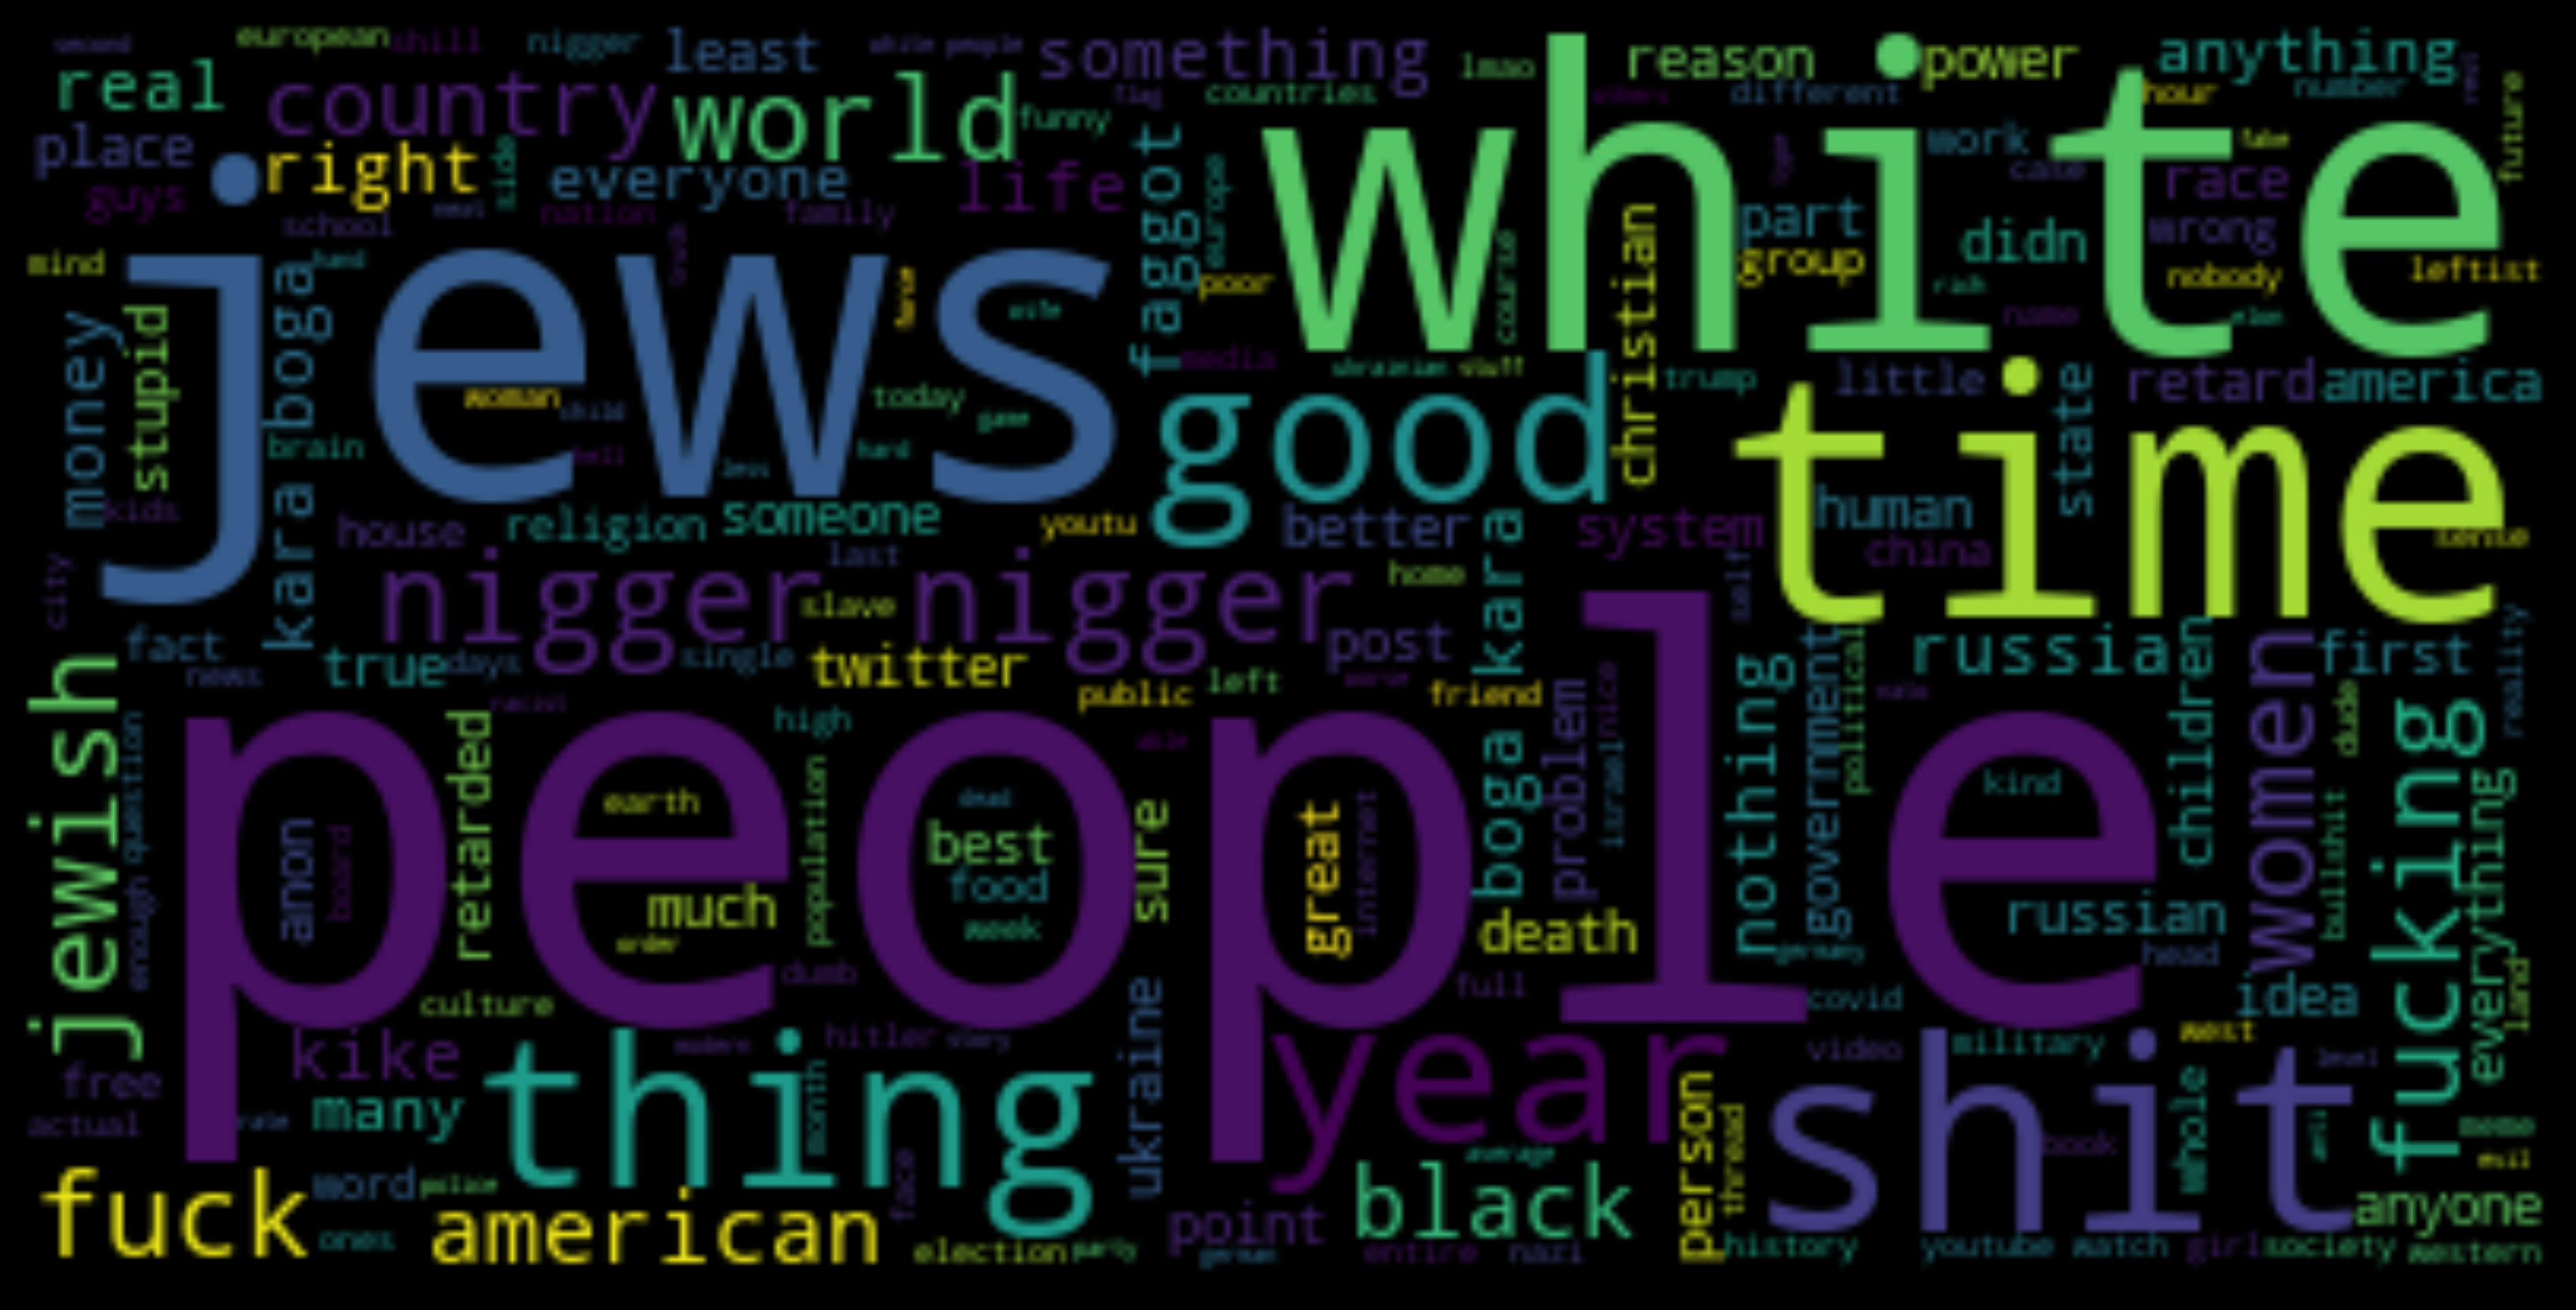

In [23]:
# lets create a word cloud of the most common words in the comments
from wordcloud import WordCloud

# create a string of all the comments
all_comments = list()
for comment in df['comment']:
    all_comments.extend(comment)

print(len(all_comments)) # the number of unique words in the comments

# create a word cloud object
wordcloud = WordCloud().generate(' '.join(all_comments))

# plot the word cloud, make it larger
plt.figure(figsize=(15,10), facecolor='k', dpi=320, edgecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

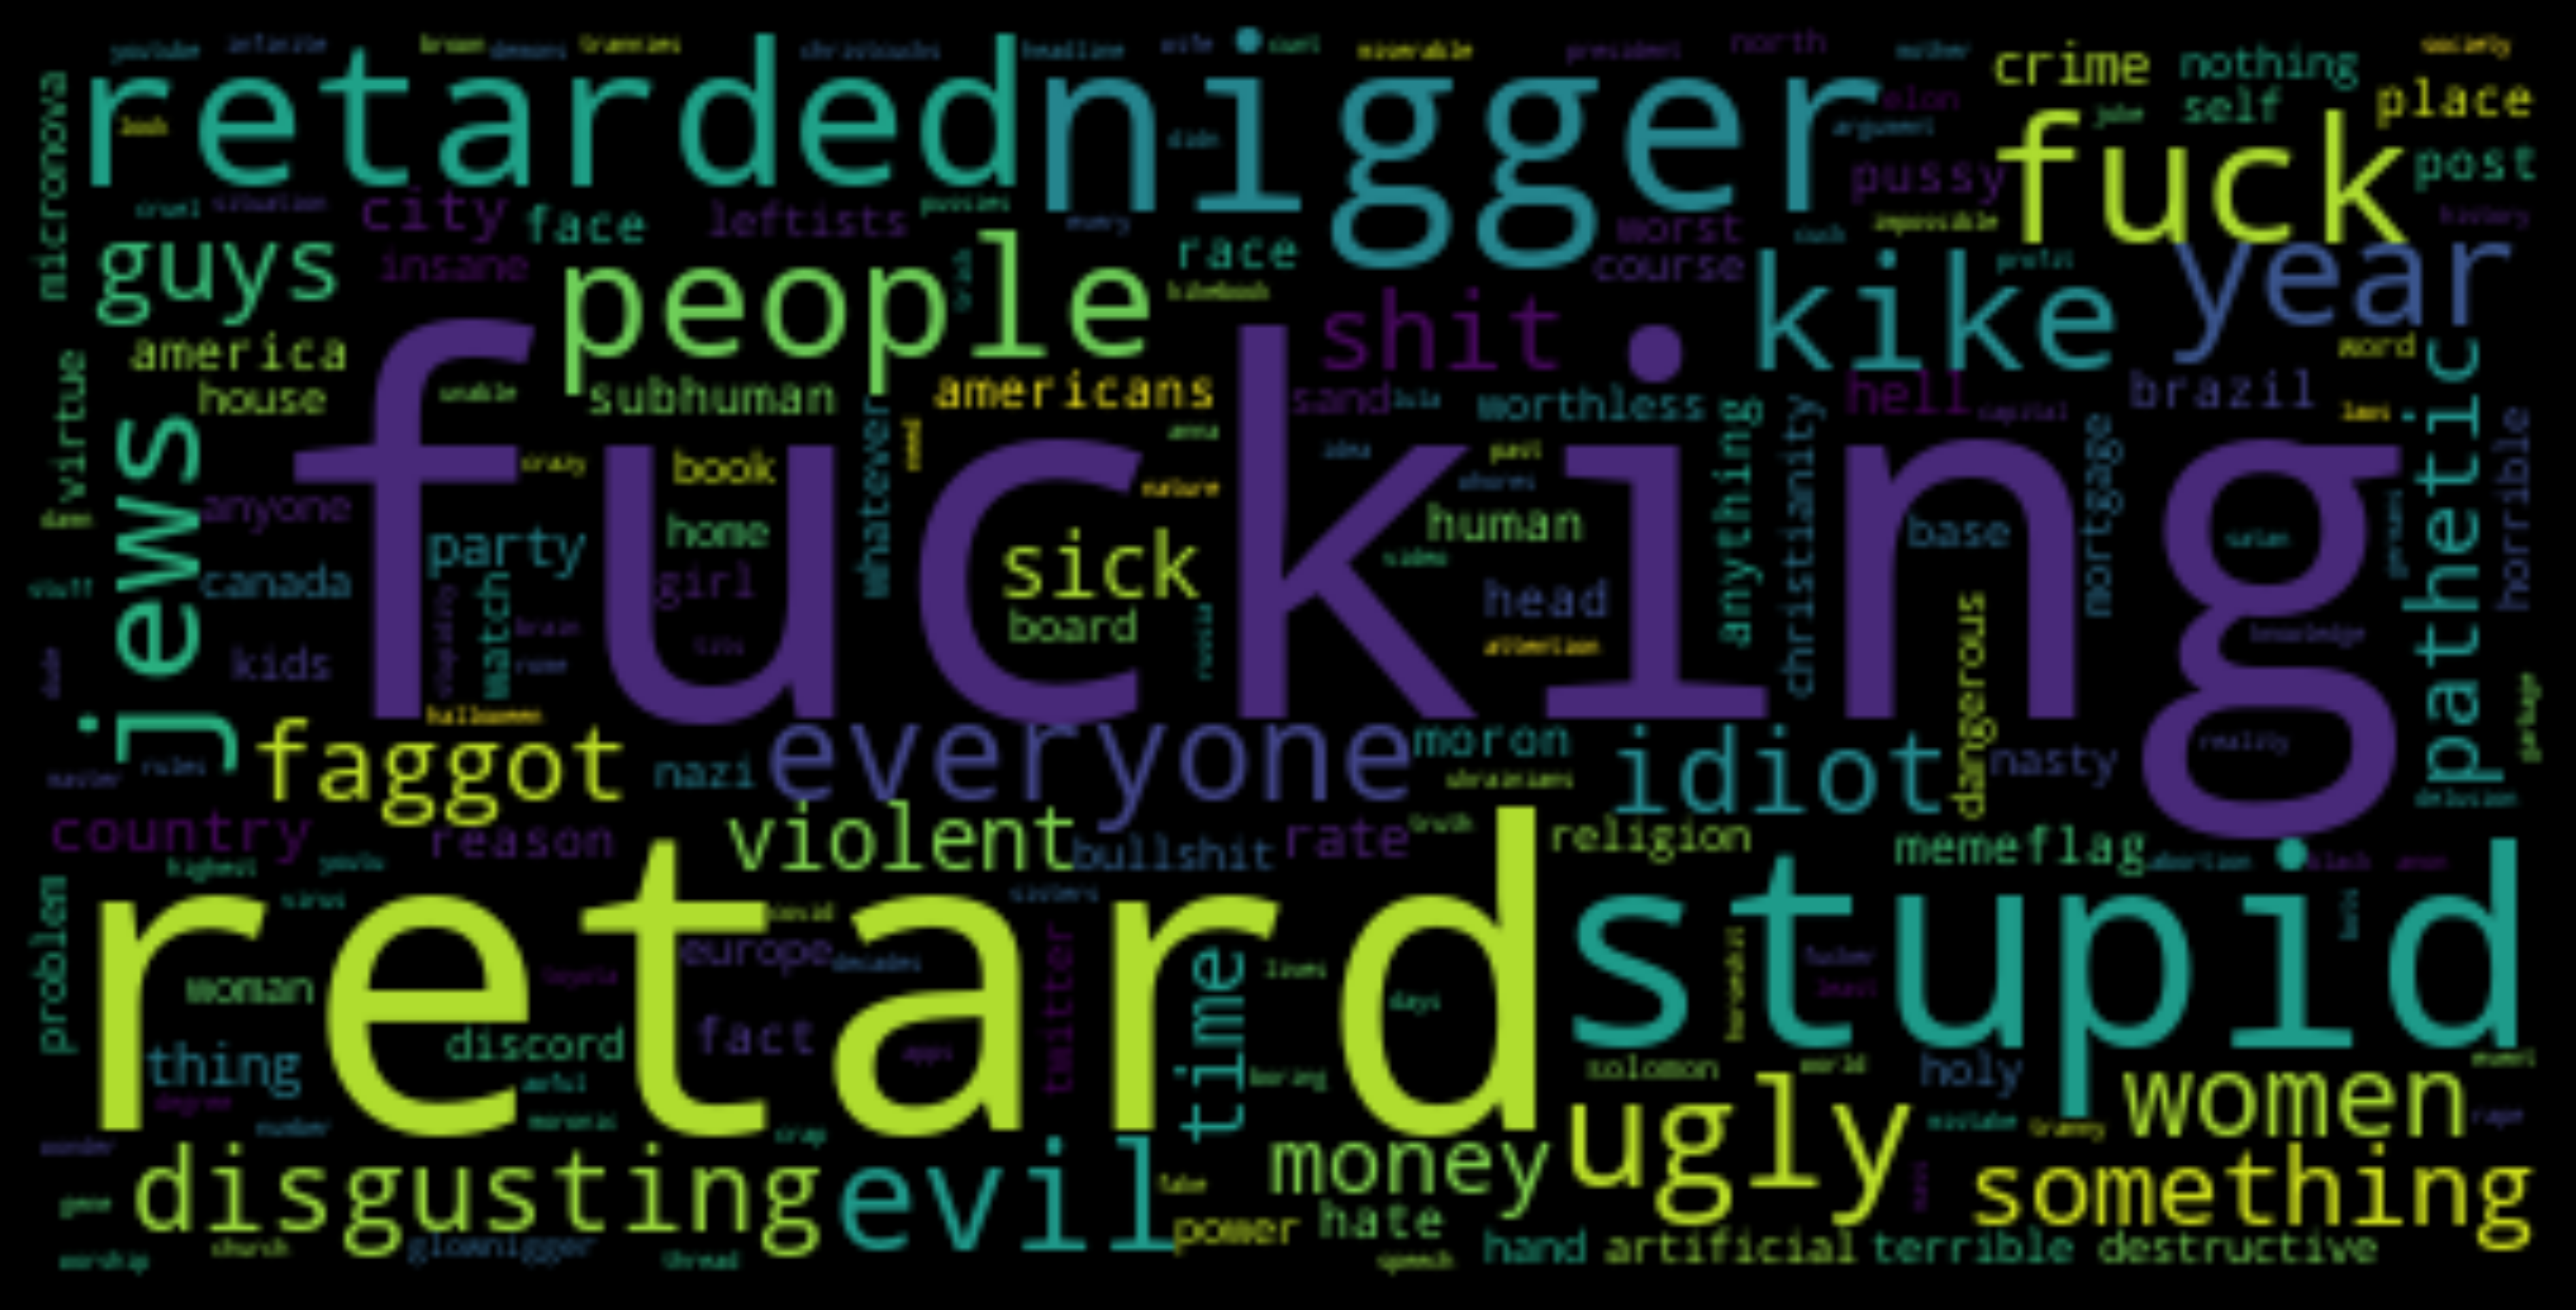

In [24]:
# lets create a word cloud of the most common words in the comments, but only for negative comments
negative_comments = ' '.join(df[df['sentiment'] < -0.5]['comment'].apply(lambda x: ' '.join(x)))

# create a word cloud object
wordcloud = WordCloud().generate(negative_comments)

plt.figure(figsize=(15,10), facecolor='k', dpi=320, edgecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
# check how many unique words are in the comments
total_unique = len(all_comments)

total_words = 0
for comment in df['comment']:
    total_words += len(comment)

# average unique words per comment
unique_words_by_comment = total_unique / total_words
unique_words_by_comment

1.0

In [26]:
total_words

75916

In [27]:
# check how many average words are in the comments
average_words_by_comment = sum(df['length']) / len(df)
average_words_by_comment

13.06194081211287

## Hate Analysis in 4chan: A Case Study
### We scraped data from -> https://en.wikipedia.org/wiki/List_of_ethnic_slurs to generate a hate term corpus which then we used to calculate hate scores for each post in 4chan. Then we calculated the hate score for each thread and plotted the results.

In [28]:
# load the 2 other data frames to check on hate speech
df_hate = pd.read_csv('../../GeneralData/ethnic_slurs.csv')
df_hate.head(20)

Term  \
0                                     abbie abe abie    
1                                                abc    
2                                               abcd    
3                                   abidabeed plural    
4                                            aboabbo    
5   afro engineering african engineering or nigger...   
6                                            ah chah    
7                                           ali baba    
8                          alligator bait gator bait    
9                                        alpine serb    
10                                            ang mo    
11                                               ann    
12                                    annamite mites    
13                                               ape    
14                                             apple    
15                                   arabush aravush    
16                                argieargies plural    
17                                              armo    
18                                       asing aseng    
19                                         ashkenazi    

                                             Location  \
0                                      north america    
1                                          east asia    
2                             south asians in the us    
3                       middle east and north africa    
4                                          australia    
5                                      united states    
6                                          hong kong    
7                                      united states    
8   united states more commonly used in states whe...   
9            serbocroatian alpski srbin exyugoslavia    
10                                malaysia singapore    
11                                     north america    
12                                    french english    
13                                     united states    
14                                     north america    
15                                            israel    
16                                    united kingdom    
17                                     united states    
18                                         indonesia    
19                                            israel    

                                               Target  \
0                                         jewish men    
1   americanborn chinese han or other chinese incl...   
2   americanborn confused desi indian americans or...   
3                               black african people    
4                       australian aboriginal person    
5                              black american people    
6                                 south asian people    
7                                       iraqi people    
8             black people especially black children    
9                         people of slovenian origin    
10           european people especially dutch people    
11               white women whiteacting black women    
12                                 vietnamese people    
13                                      black people    
14                                  native americans    
15                                             arabs    
16                                  argentine people    
17                         armenianarmenian american    
18    nonindonesian people especially chinese people    
19                                    ashkenazi jews    

                                              Meaning  
0   originated before the 1950s from the proper na...  
1   the term implies an otherness or lack of conne...  
2   used chiefly by south asian immigrants to impl...  
3   arabic for slave associated with the arab slav...  
4   originally this was simply an informal term fo...  
5   shoddy secondrate or unconventional makeshift ...  
6   from cantonese yale ach from acch meaning good...  
7      

In [29]:
# r strip Location column
df_hate['Location'] = df_hate['Location'].apply(lambda x: x.rstrip())
df_hate.head(20)

Term  \
0                                     abbie abe abie    
1                                                abc    
2                                               abcd    
3                                   abidabeed plural    
4                                            aboabbo    
5   afro engineering african engineering or nigger...   
6                                            ah chah    
7                                           ali baba    
8                          alligator bait gator bait    
9                                        alpine serb    
10                                            ang mo    
11                                               ann    
12                                    annamite mites    
13                                               ape    
14                                             apple    
15                                   arabush aravush    
16                                argieargies plural    
17                                              armo    
18                                       asing aseng    
19                                         ashkenazi    

                                             Location  \
0                                       north america   
1                                           east asia   
2                              south asians in the us   
3                        middle east and north africa   
4                                           australia   
5                                       united states   
6                                           hong kong   
7                                       united states   
8   united states more commonly used in states whe...   
9             serbocroatian alpski srbin exyugoslavia   
10                                 malaysia singapore   
11                                      north america   
12                                     french english   
13                                      united states   
14                                      north america   
15                                             israel   
16                                     united kingdom   
17                                      united states   
18                                          indonesia   
19                                             israel   

                                               Target  \
0                                         jewish men    
1   americanborn chinese han or other chinese incl...   
2   americanborn confused desi indian americans or...   
3                               black african people    
4                       australian aboriginal person    
5                              black american people    
6                                 south asian people    
7                                       iraqi people    
8             black people especially black children    
9                         people of slovenian origin    
10           european people especially dutch people    
11               white women whiteacting black women    
12                                 vietnamese people    
13                                      black people    
14                                  native americans    
15                                             arabs    
16                                  argentine people    
17                         armenianarmenian american    
18    nonindonesian people especially chinese people    
19                                    ashkenazi jews    

                                              Meaning  
0   originated before the 1950s from the proper na...  
1   the term implies an otherness or lack of conne...  
2   used chiefly by south asian immigrants to impl...  
3   arabic for slave associated with the arab slav...  
4   originally this was simply an informal term fo...  
5   shoddy secondrate or unconventional makeshift ...  
6   from cantonese yale ach from acch meaning good...  
7      

In [30]:
# make a set of all unique words in Term 
hate_terms = set()
for term in df_hate['Term']:
    for word in term.split():
        if len(word) < 4:
            continue
        hate_terms.add(word)

In [31]:
# check if the comments contain any of the hate words
hate_score = []
for comment in df['comment']:
    hate_count = 0
    for content in comment:
        for word in hate_terms:
            if word in content:
                hate_count += 1

    hate_score.append(hate_count)

# add the hate score to the dataframe
df['hate_score'] = hate_score
df.head()
                

title  \
2                     All the cool kids are doing it.   
3                     All the cool kids are doing it.   
7   &gt;Two 16-year-old twins escaped from their a...   
9   &gt;Two 16-year-old twins escaped from their a...   
13  &gt;State Sen. Scott Wiener is mobilizing alli...   

                                              comment  length  sentiment  \
2   [richard, spencer, tier, opposition, ukrainian...       8   0.200000   
3   [many, brains, titanic, imagery, their, meme, ...       9   0.150000   
7                         [they, black, nobody, this]       4  -0.166667   
9   [bitch, your, good, women, physical, mental, h...       7   0.200000   
13          [this, paper, everything, italy, crooked]       5   0.000000   

    subjectivity  hate_score  
2       0.300000           1  
3       0.650000           0  
7       0.433333           1  
9       0.314286           0  
13      0.100000           0

In [32]:
df.head(20)

title  \
2                     All the cool kids are doing it.   
3                     All the cool kids are doing it.   
7   &gt;Two 16-year-old twins escaped from their a...   
9   &gt;Two 16-year-old twins escaped from their a...   
13  &gt;State Sen. Scott Wiener is mobilizing alli...   
14  As history our guide: they jack up prices, peo...   
16  This is what happens when you pay them $15 an ...   
17  This is what happens when you pay them $15 an ...   
18  This is what happens when you pay them $15 an ...   
19  This is what happens when you pay them $15 an ...   
21  If the Russians haven&#039;t adequately mainta...   
22  If the Russians haven&#039;t adequately mainta...   
24  If the Russians haven&#039;t adequately mainta...   
25  How are /pol/‘s paranoid schizos explaining th...   
26  Kanye West is a controlled opposition deceiver...   
27  Kanye West is a controlled opposition deceiver...   
29  Kanye West is a controlled opposition deceiver...   
31  Previous: &gt;&gt;400700588Timeline /tug/: htt...   
33  Previous: &gt;&gt;400700588Timeline /tug/: htt...   
34  Previous: &gt;&gt;400700588Timeline /tug/: htt...   

                                              comment  length  sentiment  \
2   [richard, spencer, tier, opposition, ukrainian...       8   0.200000   
3   [many, brains, titanic, imagery, their, meme, ...       9   0.150000   
7                         [they, black, nobody, this]       4  -0.166667   
9   [bitch, your, good, women, physical, mental, h...       7   0.200000   
13          [this, paper, everything, italy, crooked]       5   0.000000   
14  [leftists, world, nuclear, hellscape, exchange...      17   0.000000   
16  [real, economies, western, nations, permanent,...      12   0.100000   
17  [window, years, last, less, drain, everyone, b...      11  -0.208333   
18  [today, sovereign, debt, crisis, itself, infla...      16   0.416667   
19  [companies, shit, mass, offs, shit, benefits, ...      28   0.008333   
21  [jajajaja, your, dick, retarded, piece, shit, ...       7  -0.500000   
22  [russians, nuclear, triad, country, bankrupt, ...      36  -0.166667   
24           [false, premise, russian, army, ukraine]       5  -0.200000   
25  [israel, damned, they, they, they, ways, sabbath]       7   0.000000   
26  [gematriaeffect, newsgematrinator, comfreetofi...       4   0.000000   
27  [faggot, that, need, favorite, celebrity, that...       9   0.250000   
29           [kike, anon, kikeholy, pathetic, topkek]       5  -1.000000   
31  [blackie, they, there, riots, year, good, time...       8   0.700000   
33  [exciting, fact, there, wild, concept, mutt, c...      16   0.027778   
34    [they, laws, niggers, place, private, security]       6   0.000000   

    subjectivity  hate_score  
2       0.300000           1  
3       0.650000           0  
7       0.433333           1  
9       0.314286           0  
13      0.100000           0  
14      0.000000           4  
16      0.150000           2  
17      0.408333           1  
18      0.500000           1  
19      0.750000           2  
21      0.800000           0  
22      0.700000           4  
24      0.300000           1  
25      0.000000           0  
26      0.000000           0  
27      0.500000           1  
29      1.000000           2  
31      0.600000           1  
33      0.500000           1  
34      0.375000           1

In [33]:
# get the top 5 rows with the highest hate score
df.sort_values(by='hate_score', ascending=False).head(5)

title  \
9674  What did Kanye mean by this, is /pol/ comprise...   
4982  He is mostly known for not being Michael Jorda...   
5093  your corrupt right wing politicians are crumbl...   
3764                         What do I put on it /pol/?   
7052  All non-Whites are the result of Cro-Magnon (W...   

                                                comment  length  sentiment  \
9674  [nigger, nigger, nigger, nigger, nigger, nigge...     156   0.000000   
4982  [nigger, nigger, nigger, nigger, nigger, nigge...     113   0.000000   
5093  [this, spam, thread, faggot, niggers, obvious,...      88   0.000000   
3764  [nigger, niggerniggerniggernigger, niggernigge...      16   0.000000   
7052  [theory, they, africans, wrong, releases, htmh...     123  -0.007237   

      subjectivity  hate_score  
9674      0.000000         156  
4982      0.000000         113  
5093      0.500000          22  
3764      0.000000          16  
7052      0.210526          15

In [34]:
# Get the percentage of hate score devided by the total length of the comment
df['hate_score_percentage'] = df['hate_score'] / df['length'] * 100
df.head()

title  \
2                     All the cool kids are doing it.   
3                     All the cool kids are doing it.   
7   &gt;Two 16-year-old twins escaped from their a...   
9   &gt;Two 16-year-old twins escaped from their a...   
13  &gt;State Sen. Scott Wiener is mobilizing alli...   

                                              comment  length  sentiment  \
2   [richard, spencer, tier, opposition, ukrainian...       8   0.200000   
3   [many, brains, titanic, imagery, their, meme, ...       9   0.150000   
7                         [they, black, nobody, this]       4  -0.166667   
9   [bitch, your, good, women, physical, mental, h...       7   0.200000   
13          [this, paper, everything, italy, crooked]       5   0.000000   

    subjectivity  hate_score  hate_score_percentage  
2       0.300000           1                   12.5  
3       0.650000           0                    0.0  
7       0.433333           1                   25.0  
9       0.314286           0                    0.0  
13      0.100000           0                    0.0

### Percentage of Hate Score out of total comments -> 6.02%

In [35]:
# get the sum of the total hate score / sum of the total length of the comment * 100
percentage_total_hate = df['hate_score'].sum() / df['length'].sum() * 100
f"{percentage_total_hate:.2f}%"

'6.25%'

In [36]:
# get the top 5 rows with the highest hate score percentage, where length > 5
df[df['length'] > 5].sort_values(by='hate_score_percentage', ascending=False).head(7)

title  \
3764                         What do I put on it /pol/?   
4982  He is mostly known for not being Michael Jorda...   
9674  What did Kanye mean by this, is /pol/ comprise...   
9269  I repeat REDDIT IS DOWNI don&#039;t use other ...   
1940  Intredasting we are not having BBC treads righ...   
7889  He says that Jews are racially superior to all...   
1173  &gt;There&#039;s nobody that gets judged more ...   

                                                comment  length  sentiment  \
3764  [nigger, niggerniggerniggernigger, niggernigge...      16   0.000000   
4982  [nigger, nigger, nigger, nigger, nigger, nigge...     113   0.000000   
9674  [nigger, nigger, nigger, nigger, nigger, nigge...     156   0.000000   
9269  [niggernigger, nigger, nigger, niggernigger, n...      11   0.000000   
1940    [white, male, japanese, korean, female, thread]       6   0.000000   
7889  [sandcoons, easy, yourself, superior, brown, s...       7   0.566667   
1173  [kanye, clever, niggers, chicago, black, versi...       8   0.000000   

      subjectivity  hate_score  hate_score_percentage  
3764      0.000000          16             100.000000  
4982      0.000000         113             100.000000  
9674      0.000000         156             100.000000  
9269      0.000000          10              90.909091  
1940      0.066667           5              83.333333  
7889      0.866667           4              57.142857  
1173      0.422222           4              50.000000

### Analysing offensive speech

In [37]:
# load csv as list
import csv
with open('../../GeneralData/offensive_words.csv', 'r') as f:
    reader = csv.reader(f)
    offensive_words = list(reader)[1:]

offensive_words = [word[0] for word in offensive_words]
offensive_words

['arse',
 'arsehead',
 'arsehole',
 'ass',
 'asshole',
 'bastard',
 'bithc',
 'bloody',
 'blood',
 'bollocks',
 'brotherfucker',
 'bugger',
 'bullshit',
 'childfucker',
 'cock',
 'cocksucker',
 'crap',
 'cunt',
 'damn',
 'dick',
 'dickhead',
 'dyke',
 'fatherfucker',
 'frigger',
 'fuck',
 'goddamn',
 'godsdamn',
 'hell',
 'holy shit',
 'horseshit',
 'jesus fuck',
 'kike',
 'motherfucker',
 'nigga',
 'nigra',
 'nigger',
 'piss',
 'prick',
 'pussy',
 'shit',
 'shit ass',
 'shite',
 'sisterfucker',
 'slut',
 'son of a bithc',
 'son of a whore',
 'spastic',
 'twat',
 'wanker']

In [38]:
# check if the comments contain any of the offensive words
offensive_score = []
for comment in df['comment']:
    offensive_count = 0
    for content in comment:
        for word in offensive_words:
            if word in content:
                offensive_count += 1

    offensive_score.append(offensive_count)

# add the offensive score to the dataframe
df['offensive_score'] = offensive_score
df.head(10)

title  \
2                     All the cool kids are doing it.   
3                     All the cool kids are doing it.   
7   &gt;Two 16-year-old twins escaped from their a...   
9   &gt;Two 16-year-old twins escaped from their a...   
13  &gt;State Sen. Scott Wiener is mobilizing alli...   
14  As history our guide: they jack up prices, peo...   
16  This is what happens when you pay them $15 an ...   
17  This is what happens when you pay them $15 an ...   
18  This is what happens when you pay them $15 an ...   
19  This is what happens when you pay them $15 an ...   

                                              comment  length  sentiment  \
2   [richard, spencer, tier, opposition, ukrainian...       8   0.200000   
3   [many, brains, titanic, imagery, their, meme, ...       9   0.150000   
7                         [they, black, nobody, this]       4  -0.166667   
9   [bitch, your, good, women, physical, mental, h...       7   0.200000   
13          [this, paper, everything, italy, crooked]       5   0.000000   
14  [leftists, world, nuclear, hellscape, exchange...      17   0.000000   
16  [real, economies, western, nations, permanent,...      12   0.100000   
17  [window, years, last, less, drain, everyone, b...      11  -0.208333   
18  [today, sovereign, debt, crisis, itself, infla...      16   0.416667   
19  [companies, shit, mass, offs, shit, benefits, ...      28   0.008333   

    subjectivity  hate_score  hate_score_percentage  offensive_score  
2       0.300000           1              12.500000                0  
3       0.650000           0               0.000000                1  
7       0.433333           1              25.000000                0  
9       0.314286           0               0.000000                0  
13      0.100000           0               0.000000                0  
14      0.000000           4              23.529412                1  
16      0.150000           2              16.666667                0  
17      0.408333           1               9.090909                0  
18      0.500000           1               6.250000                0  
19      0.750000           2               7.142857                8

In [39]:
# get the top 5 rows with the highest offensive score
df.sort_values(by='offensive_score', ascending=False).head(10)

title  \
9674  What did Kanye mean by this, is /pol/ comprise...   
4982  He is mostly known for not being Michael Jorda...   
5093  your corrupt right wing politicians are crumbl...   
3764                         What do I put on it /pol/?   
2364  Previous: &gt;&gt;402026522Timeline /tug/: htt...   
9269  I repeat REDDIT IS DOWNI don&#039;t use other ...   
749   Let&#039;s have a discussion about literal ver...   
4707  My top 3 most redpilled songs:Saint PabloNew S...   
973                           Why do you hate me, anon?   
5216         Kikes banned Ye from Instagram for 30 days   

                                                comment  length  sentiment  \
9674  [nigger, nigger, nigger, nigger, nigger, nigge...     156   0.000000   
4982  [nigger, nigger, nigger, nigger, nigger, nigge...     113   0.000000   
5093  [this, spam, thread, faggot, niggers, obvious,...      88   0.000000   
3764  [nigger, niggerniggerniggernigger, niggernigge...      16   0.000000   
2364  [hahahahahahahahahaaahjahahhhhhhhhhhhhhhahahah...      75   0.008036   
9269  [niggernigger, nigger, nigger, niggernigger, n...      11   0.000000   
749   [slaves, butthurt, rebellion, higher, dimensio...      98   0.036458   
4707  [that, pussy, niggas, pussy, contracts, meyou,...      26   0.000000   
973   [holy, shit, mindsi, stupid, kike, fuckface, l...      42  -0.301667   
5216  [heyhey, fucking, linkyou, fucking, niggerfuck...       9  -0.550000   

      subjectivity  hate_score  hate_score_percentage  offensive_score  
9674      0.000000         156             100.000000              156  
4982      0.000000         113             100.000000              113  
5093      0.500000          22              25.000000               22  
3764      0.000000          16             100.000000               16  
2364      0.619643           0               0.000000               12  
9269      0.000000          10              90.909091               10  
749       0.526389           9               9.183673               10  
4707      0.000000           0               0.000000               10  
973       0.591667           4               9.523810                9  
5216      0.750000           2              22.222222                8

In [40]:
percentage_total_offensive = df['offensive_score'].sum() / df['length'].sum() * 100
f"{percentage_total_offensive:.2f}%"

'3.80%'

### Violence Analysis

In [41]:
# Read Csv as list
with open('../../GeneralData/violent_words.csv', 'r') as f:
    reader = csv.reader(f)
    violent_words = list(reader)[1:]

violent_words = [word[0] for word in violent_words]
violent_words

['acid',
 'aggressor',
 'agitator',
 'aim',
 'alert',
 'ambush',
 'ammunition',
 'anarchy',
 'anguish',
 'annihilate',
 'apartheid',
 'arms',
 'arsenal',
 'artillery',
 'assassin',
 'assassinate',
 'assault',
 'atrocity',
 'attack',
 'authority',
 'automatic',
 'faction',
 'fanatic',
 'fatal',
 'fear',
 'fearful',
 'felon',
 'ferment',
 'ferocious',
 'feud',
 'fierce',
 'fiery',
 'fight',
 'fighter',
 'force',
 'forceful',
 'forces',
 'fray',
 'frenzy',
 'front',
 'lines',
 'fuel',
 'fugitive',
 'furtive',
 'cadaver',
 'camouflage',
 'campaign',
 'captive',
 'capture',
 'careen',
 'carnage',
 'casualties',
 'cataclysm',
 'causes',
 'chaos',
 'charge',
 'charred',
 'checking',
 'clandestine',
 'clash',
 'coalition',
 'collapse',
 'combat',
 'commandos',
 'concentration',
 'concussion',
 'conflagration',
 'conflict',
 'confrontation',
 'conquer',
 'consequences',
 'consolidate',
 'conspiracy',
 'conspire',
 'control',
 'coordinates',
 'corpse',
 'counterattack',
 'countermand',
 'crash',

In [42]:
# check if the comments contain any of the violent words
violent_score = []
for comment in df['comment']:
    violent_count = 0
    for content in comment:
        for word in violent_words:
            if word in content:
                violent_count += 1

    violent_score.append(violent_count)

# add the violent score to the dataframe
df['violent_score'] = violent_score
df.head(10)

title  \
2                     All the cool kids are doing it.   
3                     All the cool kids are doing it.   
7   &gt;Two 16-year-old twins escaped from their a...   
9   &gt;Two 16-year-old twins escaped from their a...   
13  &gt;State Sen. Scott Wiener is mobilizing alli...   
14  As history our guide: they jack up prices, peo...   
16  This is what happens when you pay them $15 an ...   
17  This is what happens when you pay them $15 an ...   
18  This is what happens when you pay them $15 an ...   
19  This is what happens when you pay them $15 an ...   

                                              comment  length  sentiment  \
2   [richard, spencer, tier, opposition, ukrainian...       8   0.200000   
3   [many, brains, titanic, imagery, their, meme, ...       9   0.150000   
7                         [they, black, nobody, this]       4  -0.166667   
9   [bitch, your, good, women, physical, mental, h...       7   0.200000   
13          [this, paper, everything, italy, crooked]       5   0.000000   
14  [leftists, world, nuclear, hellscape, exchange...      17   0.000000   
16  [real, economies, western, nations, permanent,...      12   0.100000   
17  [window, years, last, less, drain, everyone, b...      11  -0.208333   
18  [today, sovereign, debt, crisis, itself, infla...      16   0.416667   
19  [companies, shit, mass, offs, shit, benefits, ...      28   0.008333   

    subjectivity  hate_score  hate_score_percentage  offensive_score  \
2       0.300000           1              12.500000                0   
3       0.650000           0               0.000000                1   
7       0.433333           1              25.000000                0   
9       0.314286           0               0.000000                0   
13      0.100000           0               0.000000                0   
14      0.000000           4              23.529412                1   
16      0.150000           2              16.666667                0   
17      0.408333           1               9.090909                0   
18      0.500000           1               6.250000                0   
19      0.750000           2               7.142857                8   

    violent_score  
2               2  
3               1  
7               0  
9               0  
13              0  
14              3  
16              1  
17              0  
18              1  
19              5

In [43]:
percentage_total_violent = df['violent_score'].sum() / df['length'].sum() * 100
f"{percentage_total_violent:.2f}%"

'6.99%'

## Lets do some natural clustering analysis, let's see how many natural clusters we can find in the data

In [44]:
# Perform a natural clustering on the comments
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# create a list of all the comments
all_comments = list()
for comment in df['comment']:
    all_comments.append(' '.join(comment))

# create a tfidf vectorizer object
vectorizer = TfidfVectorizer(stop_words='english')

# fit the vectorizer to the comments
X = vectorizer.fit_transform(all_comments)

# create a kmeans object
kmeans = KMeans(n_clusters=5, random_state=0)

# fit the kmeans object to the vectorizer
kmeans.fit(X)

# get the cluster labels
labels = kmeans.labels_

# add the cluster labels to the dataframe
df['cluster'] = labels
df.head(10)

title  \
2                     All the cool kids are doing it.   
3                     All the cool kids are doing it.   
7   &gt;Two 16-year-old twins escaped from their a...   
9   &gt;Two 16-year-old twins escaped from their a...   
13  &gt;State Sen. Scott Wiener is mobilizing alli...   
14  As history our guide: they jack up prices, peo...   
16  This is what happens when you pay them $15 an ...   
17  This is what happens when you pay them $15 an ...   
18  This is what happens when you pay them $15 an ...   
19  This is what happens when you pay them $15 an ...   

                                              comment  length  sentiment  \
2   [richard, spencer, tier, opposition, ukrainian...       8   0.200000   
3   [many, brains, titanic, imagery, their, meme, ...       9   0.150000   
7                         [they, black, nobody, this]       4  -0.166667   
9   [bitch, your, good, women, physical, mental, h...       7   0.200000   
13          [this, paper, everything, italy, crooked]       5   0.000000   
14  [leftists, world, nuclear, hellscape, exchange...      17   0.000000   
16  [real, economies, western, nations, permanent,...      12   0.100000   
17  [window, years, last, less, drain, everyone, b...      11  -0.208333   
18  [today, sovereign, debt, crisis, itself, infla...      16   0.416667   
19  [companies, shit, mass, offs, shit, benefits, ...      28   0.008333   

    subjectivity  hate_score  hate_score_percentage  offensive_score  \
2       0.300000           1              12.500000                0   
3       0.650000           0               0.000000                1   
7       0.433333           1              25.000000                0   
9       0.314286           0               0.000000                0   
13      0.100000           0               0.000000                0   
14      0.000000           4              23.529412                1   
16      0.150000           2              16.666667                0   
17      0.408333           1               9.090909                0   
18      0.500000           1               6.250000                0   
19      0.750000           2               7.142857                8   

    violent_score  cluster  
2               2        0  
3               1        3  
7               0        0  
9               0        0  
13              0        0  
14              3        2  
16              1        0  
17              0        0  
18              1        0  
19              5        3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


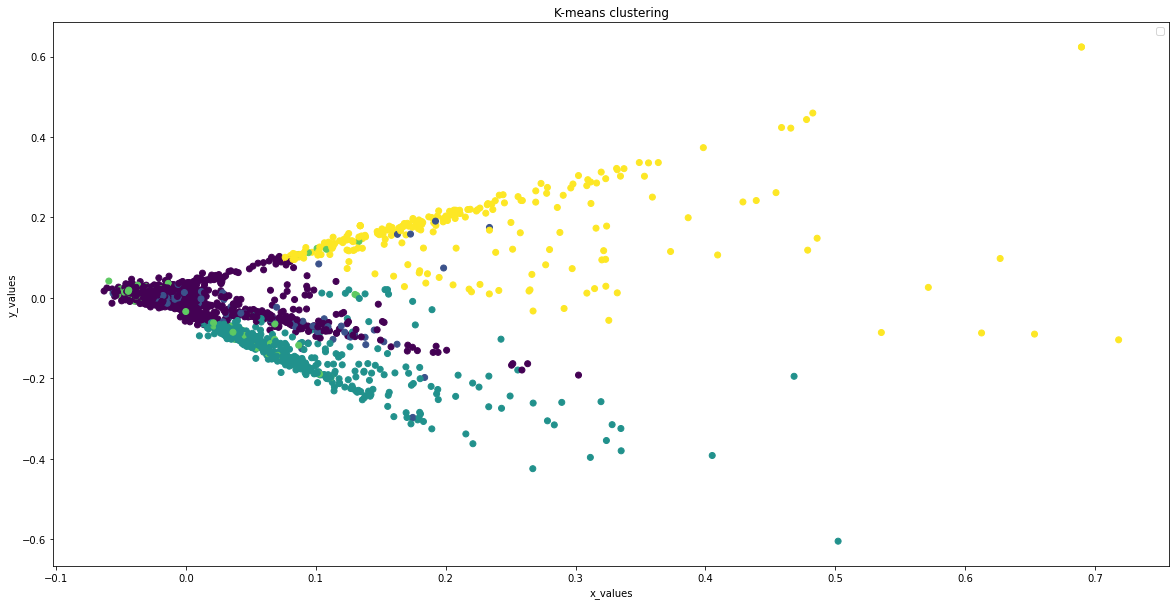

In [45]:
# Plot the clusters
from sklearn.decomposition import PCA

# create a pca object
pca = PCA(n_components=2)

# fit the pca object to the vectorizer
pca.fit(X.toarray())

# get the first two principal components
data2D = pca.transform(X.toarray())

# plot the clusters
plt.figure(figsize=(20,10))
plt.scatter(data2D[:,0], data2D[:,1], c=labels)
# Add legend, title and axis names
plt.legend()
plt.title('K-means clustering')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.show()

In [46]:
# Check the top 10 words in each cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(5):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print('\n')

Cluster 0:
 good
 women
 white
 time
 fuck
 fucking
 years
 country
 thing
 world


Cluster 1:
 nigger
 niggers
 white
 fucking
 kike
 stupid
 faggot
 dumb
 whites
 fuck


Cluster 2:
 people
 white
 good
 things
 world
 black
 time
 years
 thing
 money


Cluster 3:
 shit
 holy
 fucking
 people
 time
 fuck
 good
 fake
 piece
 dude


Cluster 4:
 jews
 white
 jewish
 people
 whites
 blacks
 history
 anti
 race
 jesus




c:\Users\nicol\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [47]:
# Get 5 random comments from each cluster
for i in range(5):
    print("Cluster %d:" % i)
    for comment in df[df['cluster'] == i]['comment'].sample(5):
        print(' '.join(comment))
    print('\n')

Cluster 0:
high profile rapthis garbage music
this years setup long best
this chinese japanese sardine truck thing
ruskinigger they mentality anything city resort depressing russia they only places their radar miami smaller cities chiraq shitskinatti dallas phoenix their radar
what they your dead fucking dead archangels more faggot dead angels yahweh bitch black white guys death kike


Cluster 1:
kanye clever niggers chicago black version white whites
illegalits dumbest questions time guns illegal niggers africa women rights time
racist nigger donkey kong
brother nigger hood springs idea those
niggers your women jewish pornography good brain


Cluster 2:
they there dots that them they people everything police corruption people first part crazy there validity pedo ring theories what odds separate pedos hours other girls first informant searches second arrest that crazy coincidence
racist hitlerbut roosevelt didn jews good hitler tiresome contempt other racescorrect most minds idiocity p

## Hate Metrics Plots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


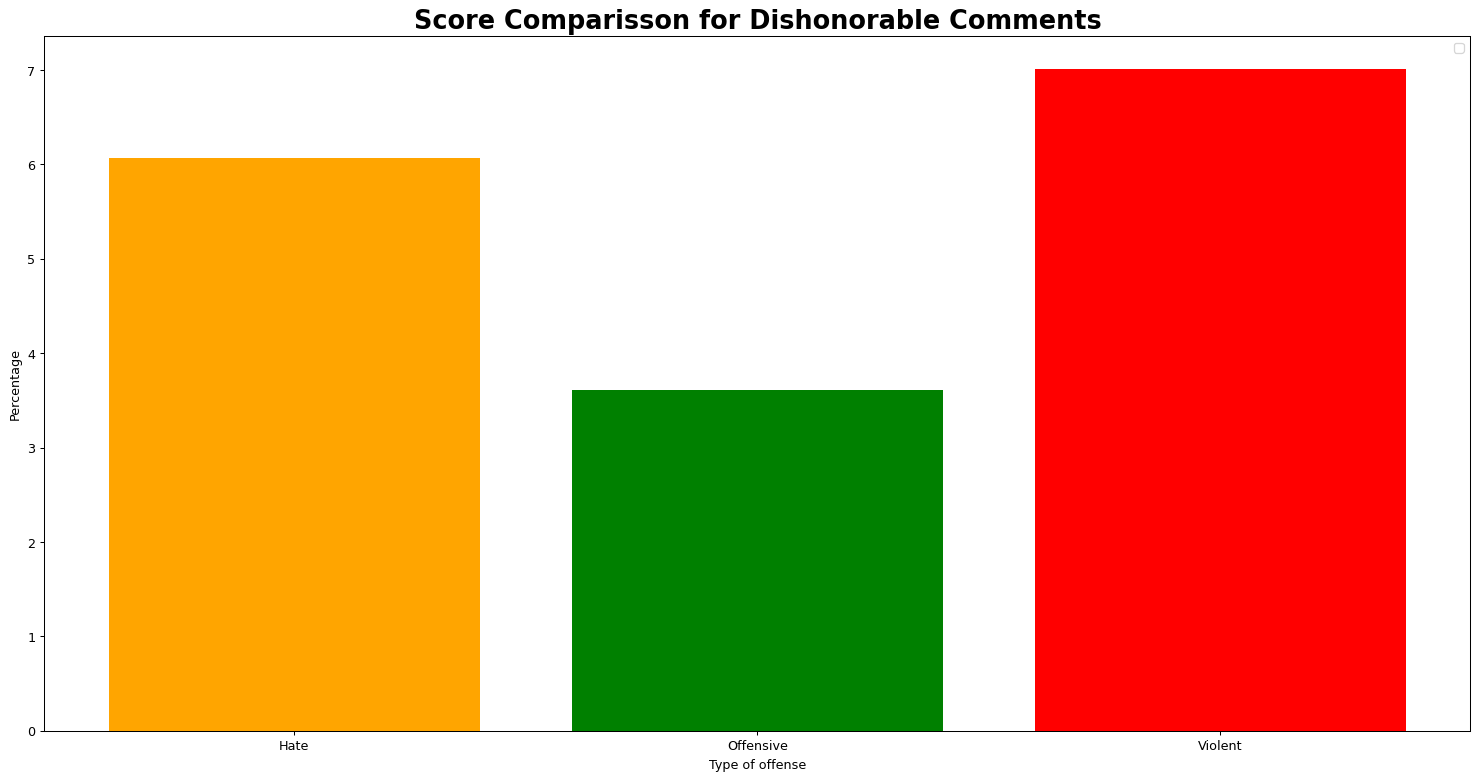

In [ ]:
# lets do histogram of percentage of hate score, pct of offensive score, pct of violent score

values = [percentage_total_hate, percentage_total_offensive, percentage_total_violent]

plt.figure(figsize=(20,10), dpi= 92)
plt.bar(['Hate', 'Offensive', 'Violent'], values, color=['orange', 'green', 'red'])
plt.title('Score Comparisson for Dishonorable Comments', fontsize=20, fontweight='bold')
plt.xlabel('Type of offense')
plt.ylabel('Percentage')
plt.legend()
plt.show()